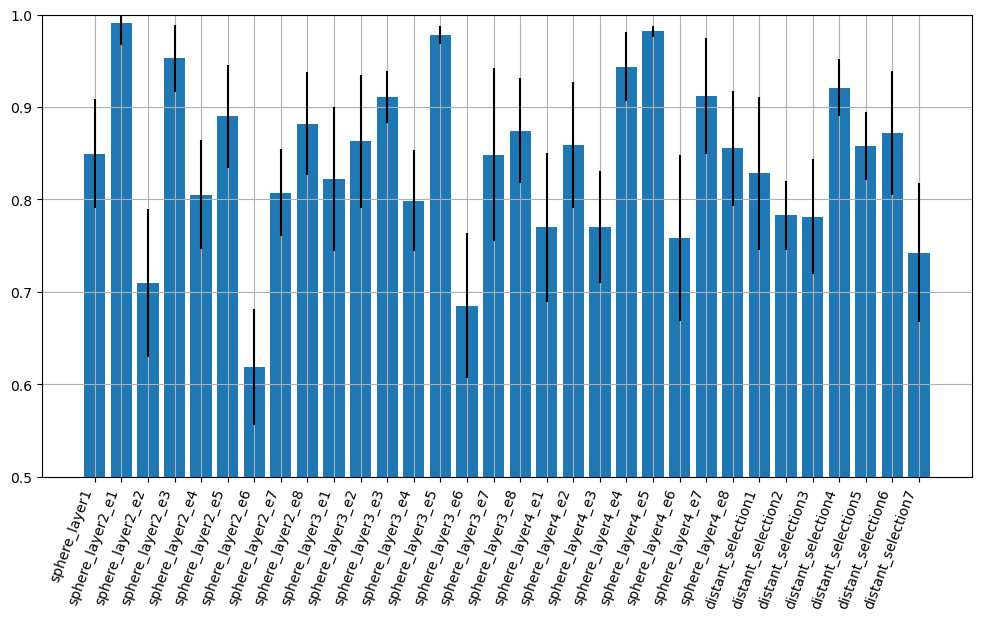

In [30]:
import shared_data as sd
from glob import glob
import utility_functions as uf
import matplotlib.pyplot as plt
import numpy as np


def get_sorting_key(result_file_path):
    return int(result_file_path.split("_")[-1].strip(".npy"))

pair_name = "LNC_NONE"
accuracy_mean_list = []
accuracy_sem_list = []
labels = []
result_path_list = []
for result_path in glob(f"{sd.RESULTS}/*{pair_name}*passthrough*validation*"):
    result_path_list.append(result_path)
result_path_list = sorted(result_path_list, key=get_sorting_key)
for result_path in result_path_list:
    cf = uf.get_config_file_from_file_path(result_path)
    accuracy_mean, accuracy_sem = uf.get_accuracy_mean_and_sem(result_path)
    selection_name = cf.sel_name
    accuracy_mean_list.append(accuracy_mean)
    accuracy_sem_list.append(accuracy_sem * np.sqrt(sd.N_CROSS_VALIDATION_COMBINATIONS))
    labels.append(selection_name)
x = [i for i, _ in enumerate(accuracy_mean_list)]
plt.figure(figsize=(12, 6))
plt.bar(x, accuracy_mean_list, yerr=accuracy_sem_list)
plt.xticks(x, labels, rotation=70, ha="right")
plt.ylim((0.5, 1))
plt.grid()